# Day 08. Exercise 05
# Clustering

## 0. Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB


In [3]:
df = df.drop('pageviews', axis=1)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

## 📌 Что такое KMeans Clustering?

**KMeans Clustering** — метод кластеризации, при котором:

- Задаётся количество кластеров `n_clusters` (K).
- Случайным образом инициализируются **центры кластеров**.
- Каждая точка относится к ближайшему центру по **евклидову расстоянию**.
- Центры пересчитываются как **среднее всех точек кластера**.
- Процесс повторяется до **сходимости (центры перестают меняться)**.

---

### ⚙️ Особенности KMeans:

- Нужно заранее указать количество кластеров `n_clusters`.
- Алгоритм чувствителен к выбросам и масштабу признаков.
- Использует **евклидово расстояние** для расчёта близости.
- Хорошо работает, если кластеры имеют **сферическую форму**.

---

### 🛠️ Используется для:
✅ Сегментации пользователей или объектов по признакам.  
✅ Уменьшения размерности данных.  
✅ Инициализации центров кластеров для других алгоритмов.

---

### 📥 Импорт для использования:

```python
from sklearn.cluster import KMeans
```

In [10]:
X = df[['num_commits', 'AVG(diff)']].values

In [48]:
km = KMeans(n_clusters=3, random_state=21)
km.fit(X)
labels = km.labels_
df['KM_cluster'] = labels
score = silhouette_score(X, labels)
print(f"Коэффициент силуэта: {score:.2f}")
centers = km.cluster_centers_

Коэффициент силуэта: 0.45


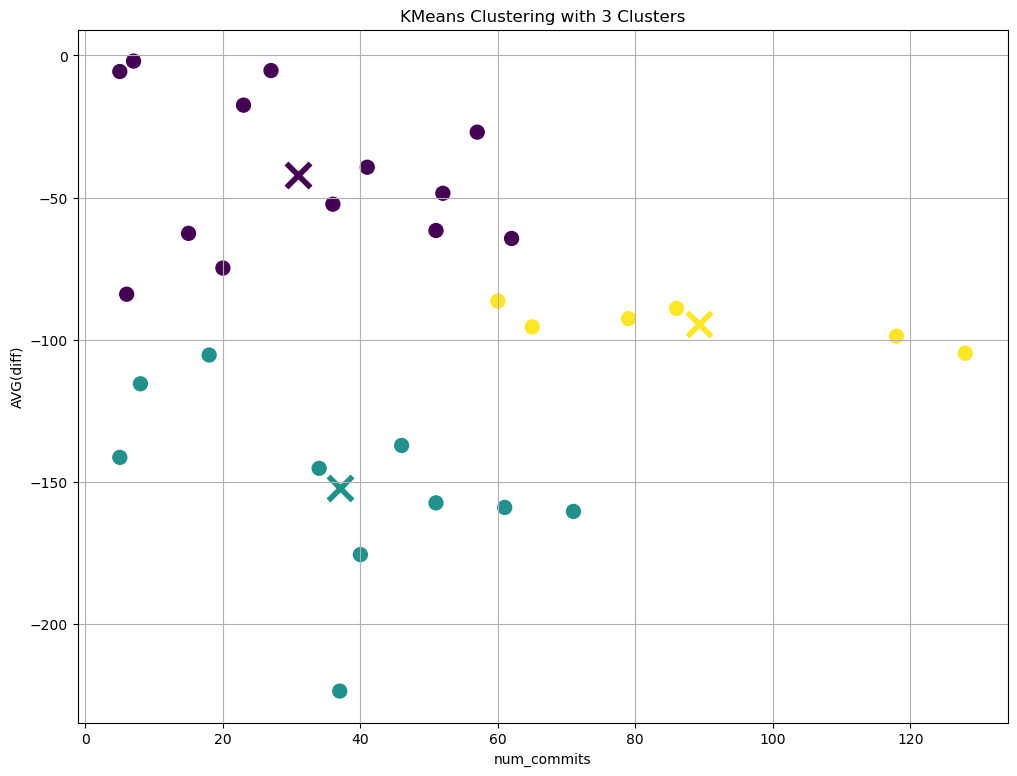

In [49]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, label='Пользователи')
colormap = cm.get_cmap('viridis')
colors = colormap(np.linspace(0, 1, km.n_clusters))
for i, center in enumerate(centers):
    plt.scatter(
        center[0],
        center[1],
        color=colors[i],
        marker='x',
        s=300,
        linewidths=4,
        label=f'Центр кластера {i}'
    )
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центры кластеров')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('KMeans Clustering with 3 Clusters')
plt.grid(True)
plt.show()


====== n_clusters = 2 ======
Silhouette Score: 0.419
Centers:
[[  39.44444444  -56.33148148]
 [  54.45454545 -147.16818182]]


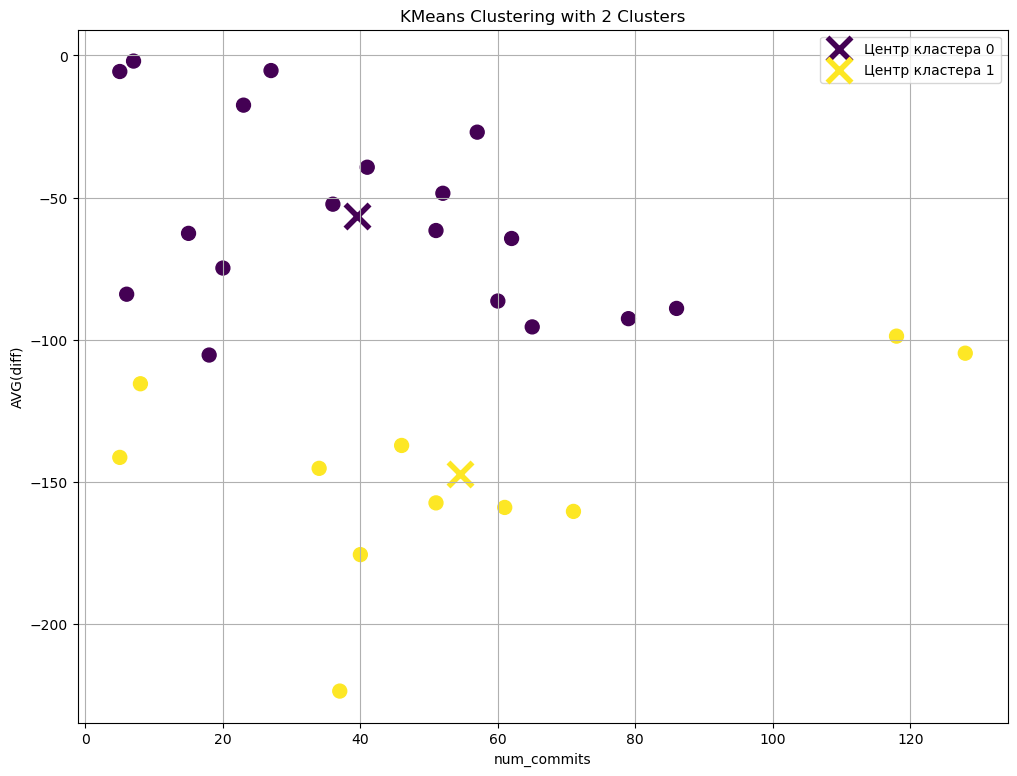


====== n_clusters = 3 ======
Silhouette Score: 0.445
Centers:
[[  30.92307692  -41.92820513]
 [  37.1        -152.075     ]
 [  89.33333333  -94.5       ]]


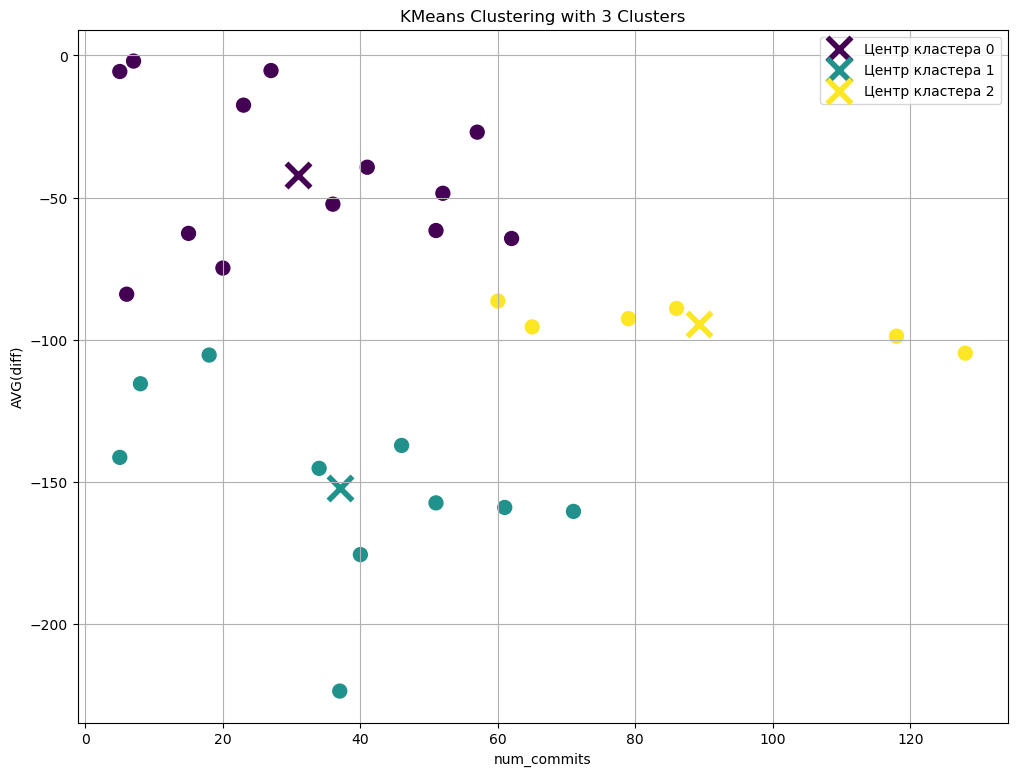


====== n_clusters = 4 ======
Silhouette Score: 0.415
Centers:
[[  33.          -38.42222222]
 [  52.         -175.2       ]
 [  89.33333333  -94.5       ]
 [  19.5        -121.45833333]]


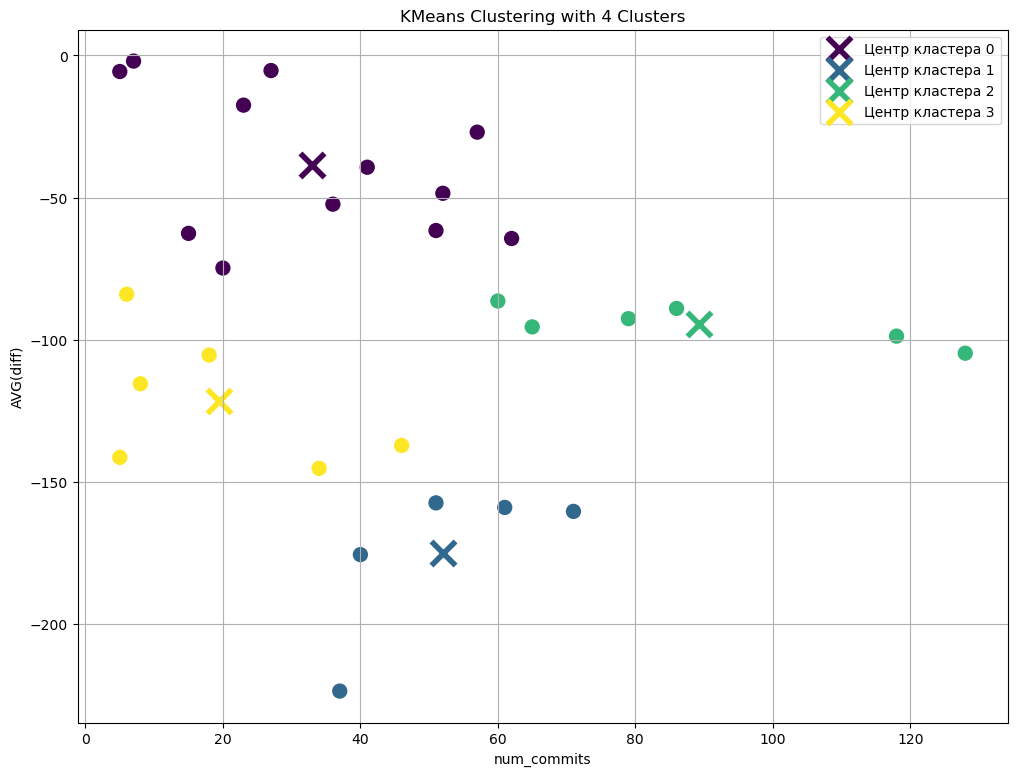


====== n_clusters = 5 ======
Silhouette Score: 0.352
Centers:
[[  40.77777778  -70.01481481]
 [  52.         -175.2       ]
 [ 102.75        -96.275     ]
 [  22.2        -128.95      ]
 [  26.66666667  -16.13888889]]


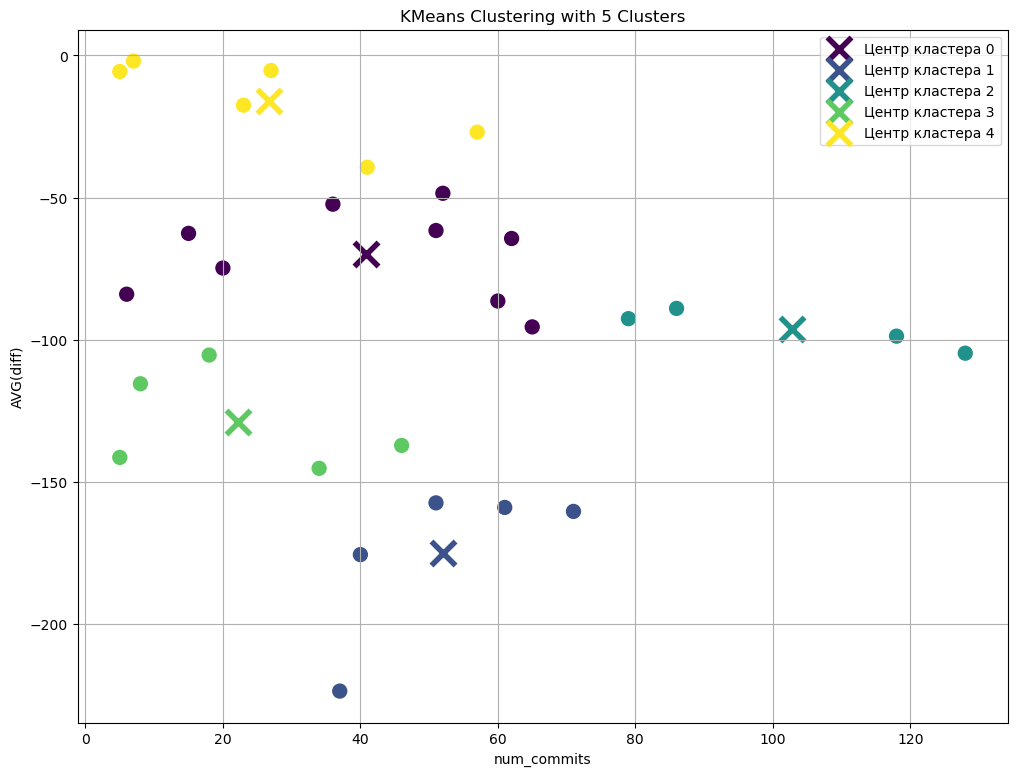

In [57]:
for k in [2, 3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=21)
    km.fit(X)
    labels = km.labels_
    centers = km.cluster_centers_
    score = silhouette_score(X, labels)
    
    print(f"\n====== n_clusters = {k} ======")
    print(f"Silhouette Score: {score:.3f}")
    print(f"Centers:\n{centers}")
    
    plt.figure(figsize=(12, 9))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
    
    colormap = cm.get_cmap('viridis')
    colors = colormap(np.linspace(0, 1, k))
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1],
                    color=colors[i],
                    marker='x',
                    s=300,
                    linewidths=4,
                    label=f'Центр кластера {i}')
        
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'KMeans Clustering with {k} Clusters')
    plt.grid(True)
    plt.legend()
    plt.show()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

## 📌 Что такое DBSCAN Clustering?

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** — метод кластеризации на основе плотности, при котором:

- Кластеры определяются как **области высокой плотности точек**.
- Выбросы автоматически определяются как **шум** и исключаются из кластеров.

---

### ⚙️ Параметры DBSCAN:

- **`eps`** — радиус окрестности (ε-окрестность), внутри которого считаются соседи.
- **`min_samples`** — минимальное количество точек в окрестности для образования кластера.

---

### 🛠️ Принципы DBSCAN:
✅ Если у точки в радиусе `eps` >= `min_samples` соседей, она становится **ядром кластера**.  
✅ Если у точки < `min_samples`, но она в радиусе `eps` ядра, она **граничная** (border).  
✅ Если точка не входит ни в один кластер, она считается **шумом (label = -1)**.

---

### 📈 Особенности:
- Не требует задания количества кластеров заранее.
- Может выделять кластеры **любой формы**.
- Хорошо работает с выбросами и шумом.
- Чувствителен к выбору `eps` и `min_samples`.

---

### 📥 Импорт для использования:

```python
from sklearn.cluster import DBSCAN
```


In [52]:
dbscan = DBSCAN(eps=20, min_samples=2)
labels = dbscan.fit_predict(X)
df['DBS_cluster'] = labels

In [53]:
if len(set(labels)) > 1 and len(set(labels)) != 1 + (1 if -1 in labels else 0):
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score не вычисляется, т.к. образовался один кластер или только шум.")

Silhouette Score: 0.383


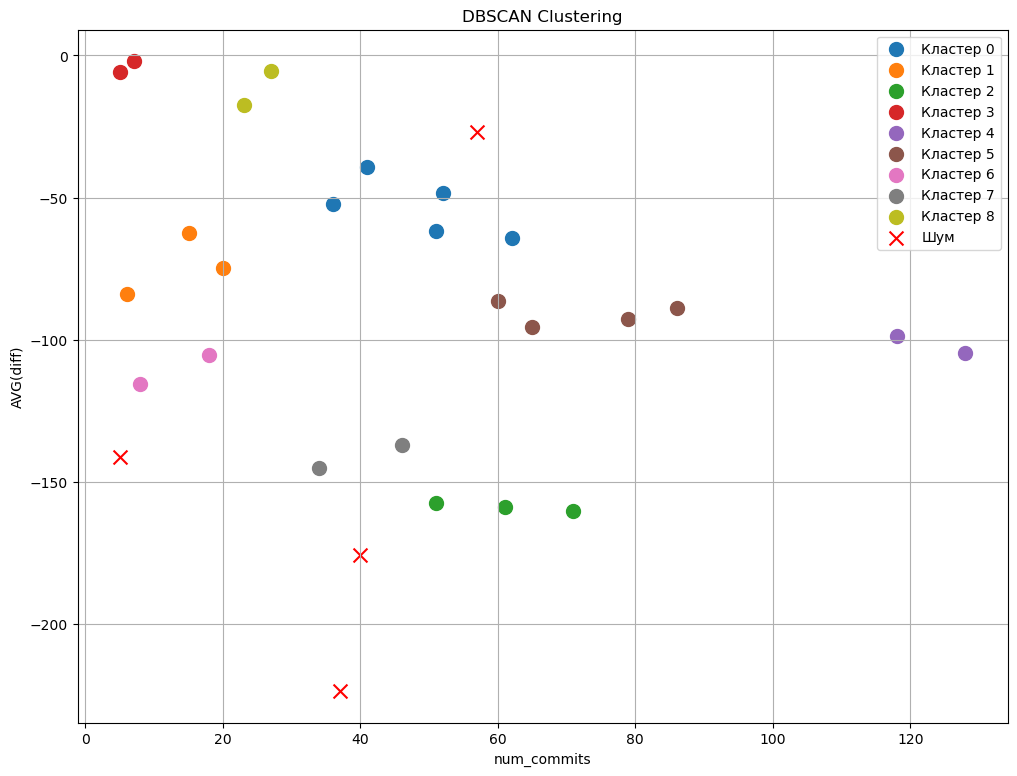

In [56]:
plt.figure(figsize=(12, 9))

unique_labels = set(labels)
colors = cm.get_cmap('viridis', len(unique_labels))

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    if k == -1:
        # Шум (noise)
        plt.scatter(xy[:, 0], xy[:, 1], c='red', marker='x', s=100, label='Шум')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], s=100, label=f'Кластер {k}')

plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.legend()
plt.show()


eps=5, min_samples=2, clusters=1, noise=27, silhouette_score=N/A


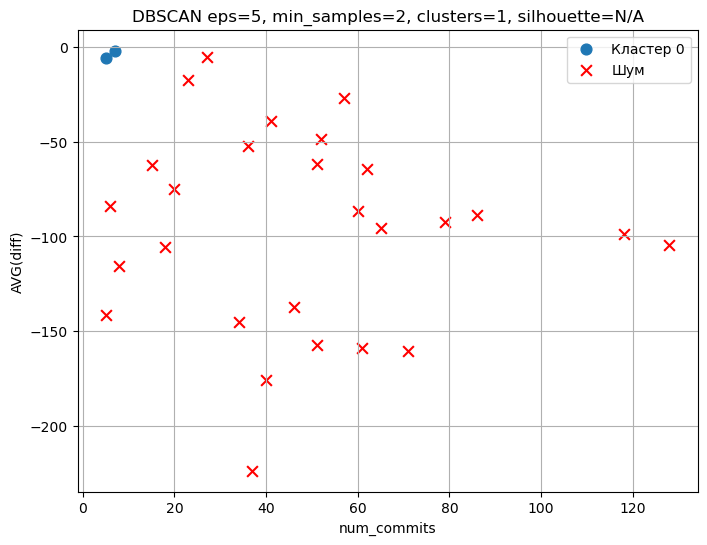

eps=5, min_samples=3, clusters=0, noise=29, silhouette_score=N/A


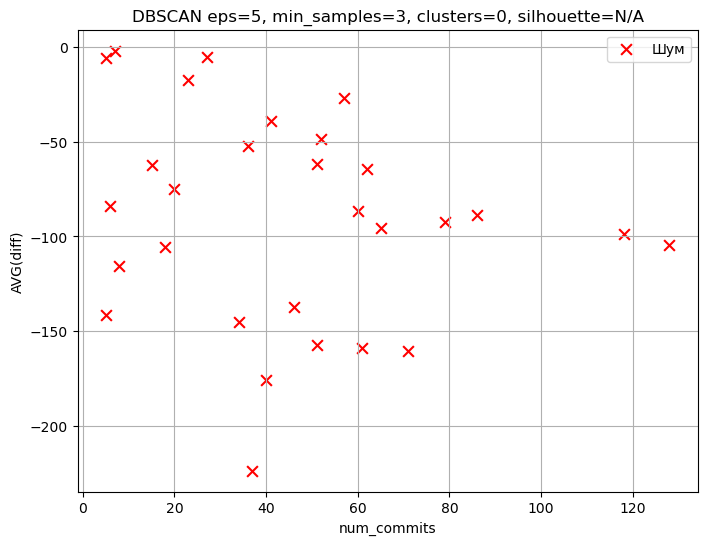

eps=5, min_samples=4, clusters=0, noise=29, silhouette_score=N/A


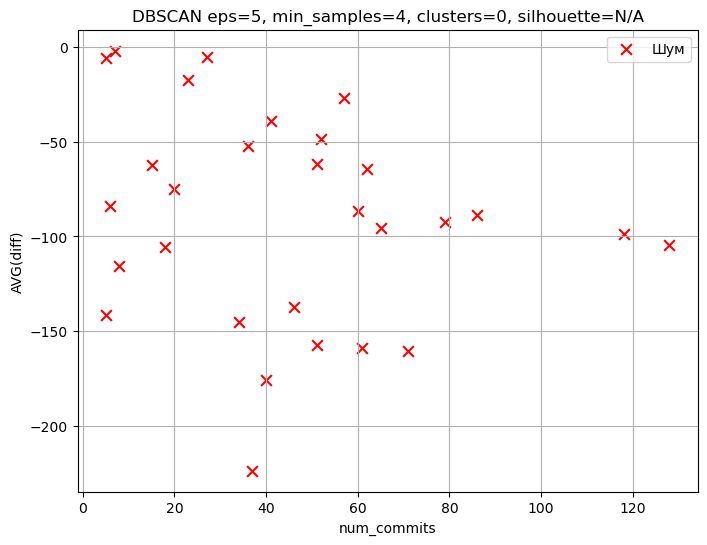

eps=5, min_samples=5, clusters=0, noise=29, silhouette_score=N/A


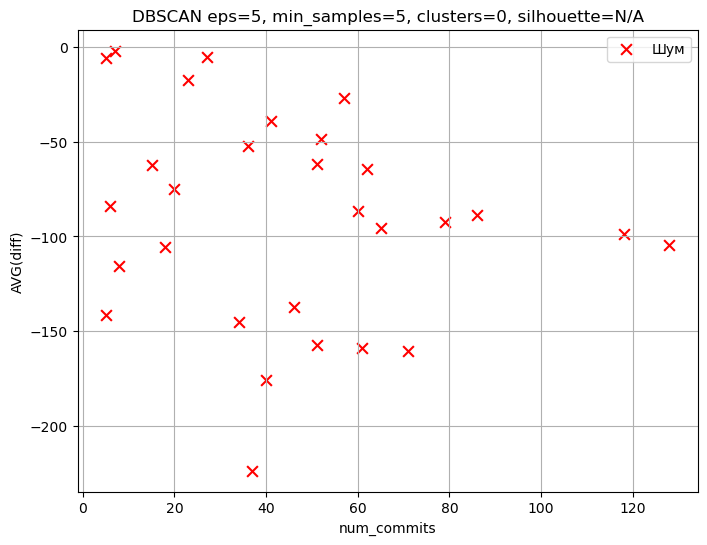

eps=10, min_samples=2, clusters=2, noise=25, silhouette_score=-0.079


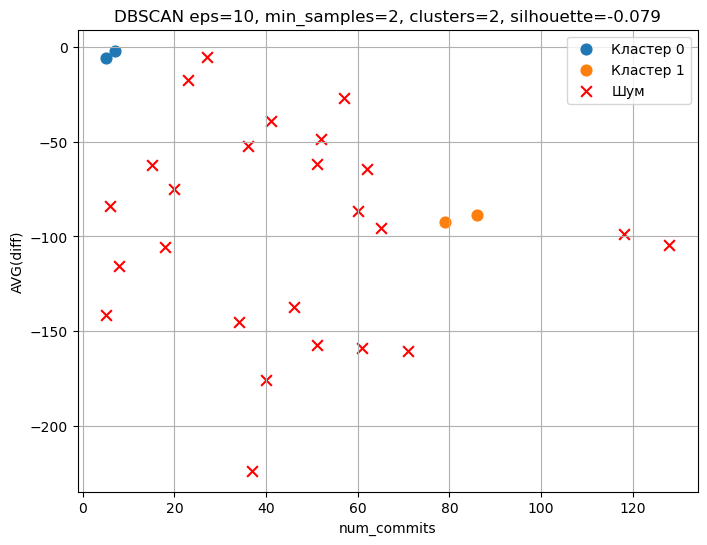

eps=10, min_samples=3, clusters=0, noise=29, silhouette_score=N/A


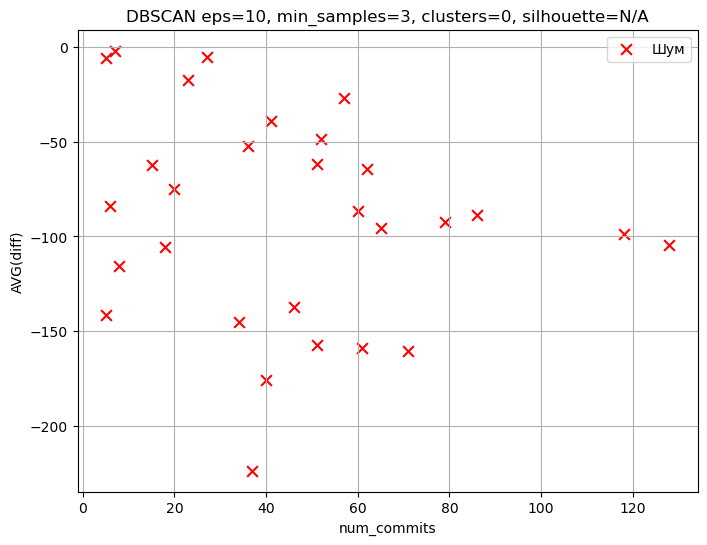

eps=10, min_samples=4, clusters=0, noise=29, silhouette_score=N/A


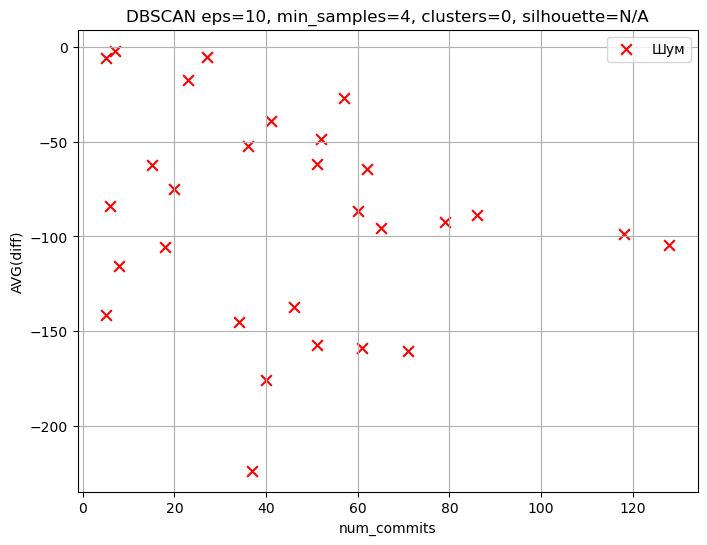

eps=10, min_samples=5, clusters=0, noise=29, silhouette_score=N/A


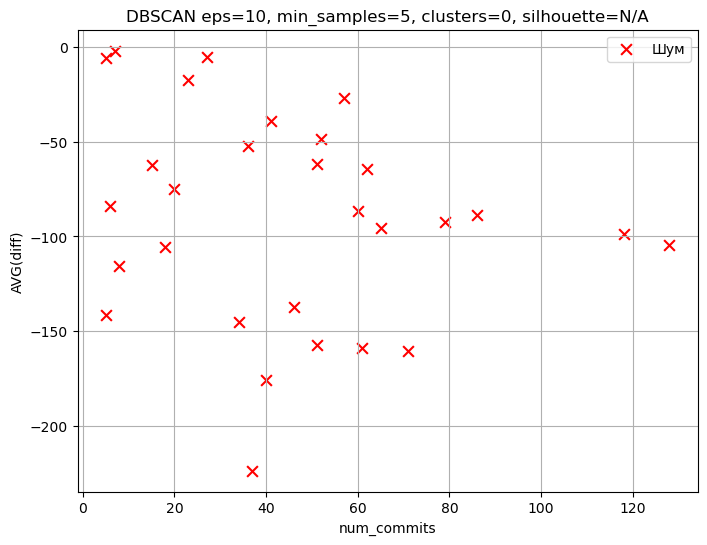

eps=15, min_samples=2, clusters=9, noise=5, silhouette_score=0.347


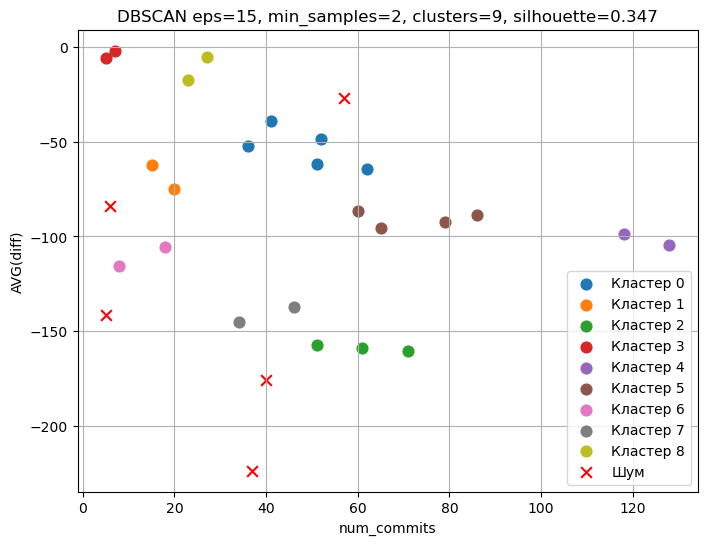

eps=15, min_samples=3, clusters=3, noise=17, silhouette_score=-0.006


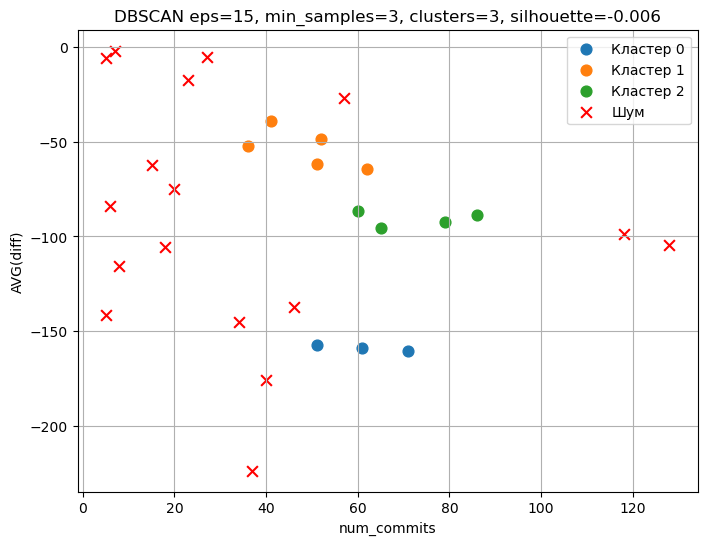

eps=15, min_samples=4, clusters=0, noise=29, silhouette_score=N/A


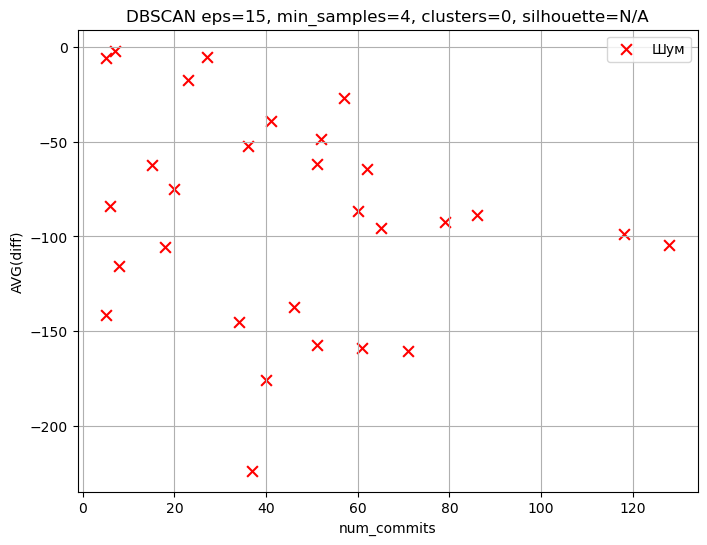

eps=15, min_samples=5, clusters=0, noise=29, silhouette_score=N/A


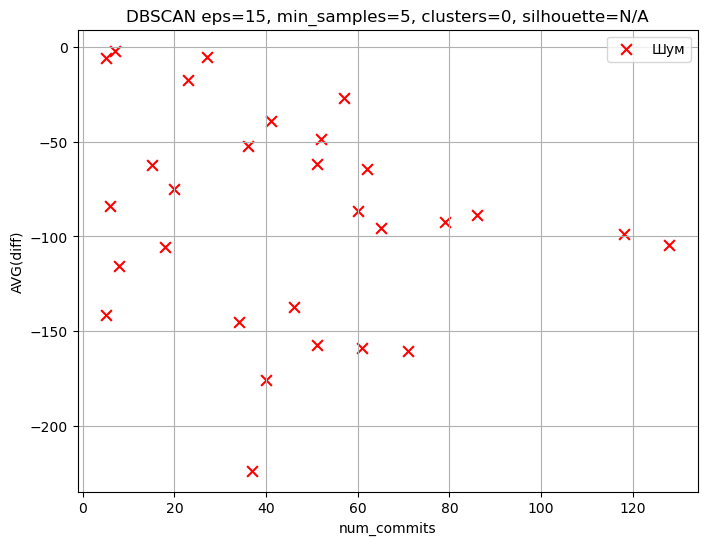

eps=20, min_samples=2, clusters=9, noise=4, silhouette_score=0.383


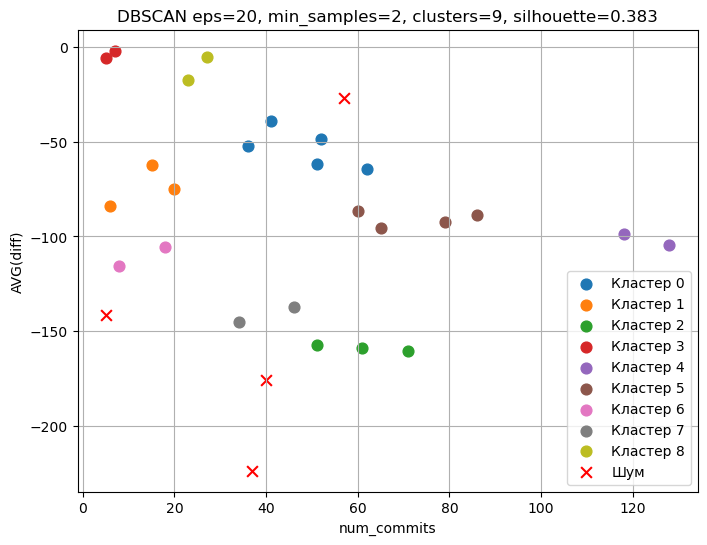

eps=20, min_samples=3, clusters=4, noise=14, silhouette_score=0.047


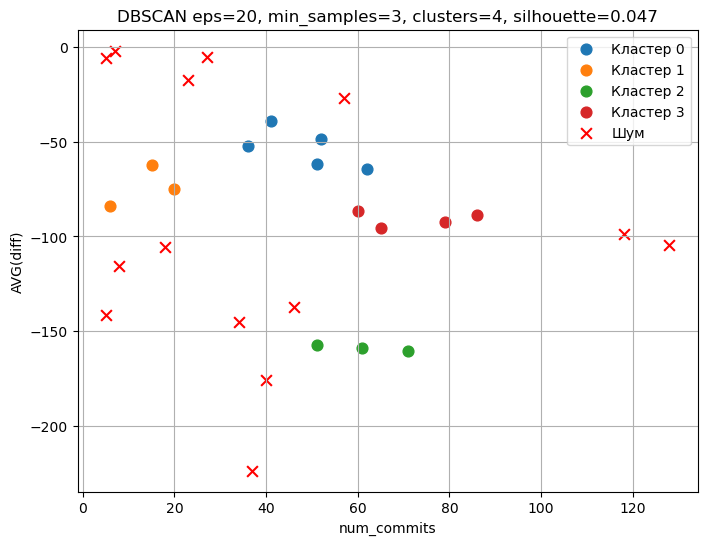

eps=20, min_samples=4, clusters=2, noise=20, silhouette_score=-0.027


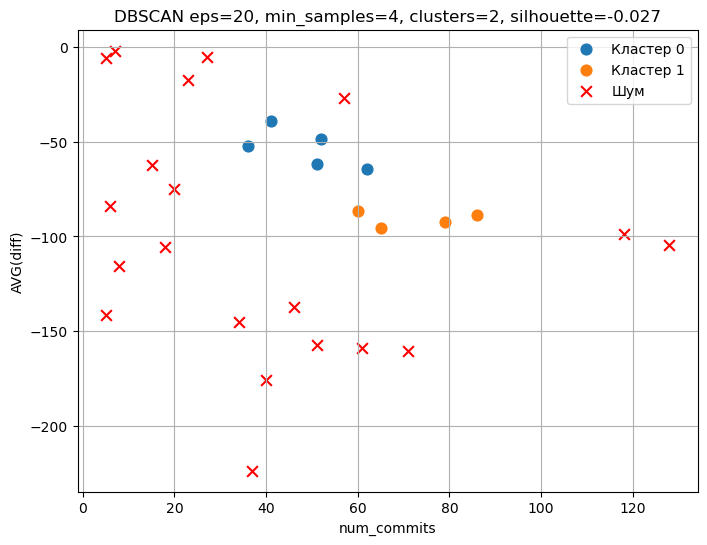

eps=20, min_samples=5, clusters=1, noise=24, silhouette_score=N/A


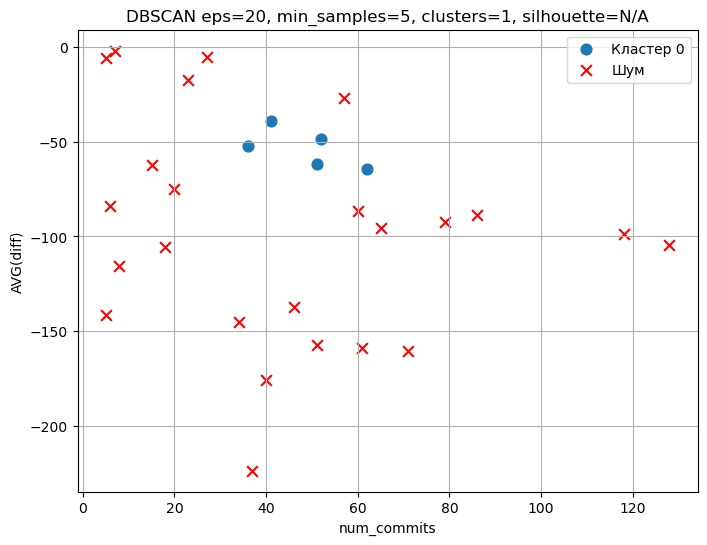

eps=25, min_samples=2, clusters=4, noise=2, silhouette_score=0.344


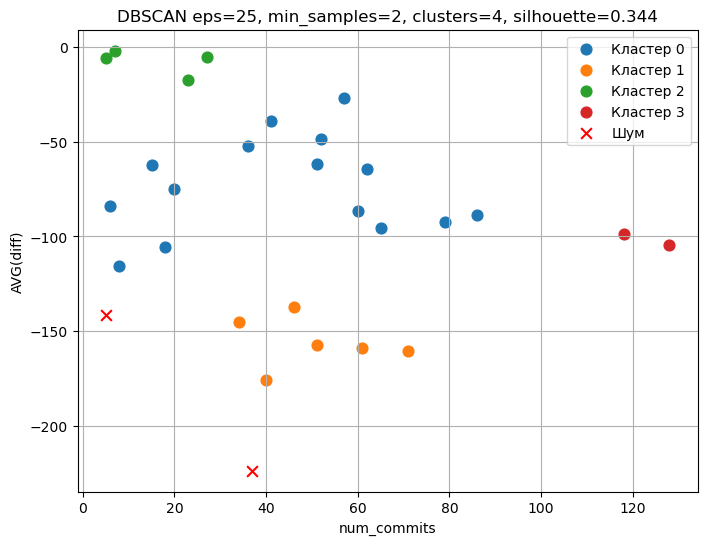

eps=25, min_samples=3, clusters=3, noise=4, silhouette_score=0.323


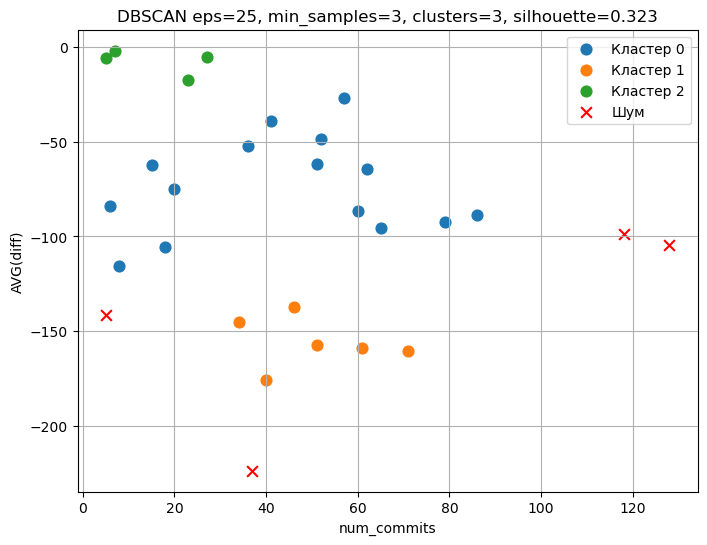

eps=25, min_samples=4, clusters=3, noise=5, silhouette_score=0.321


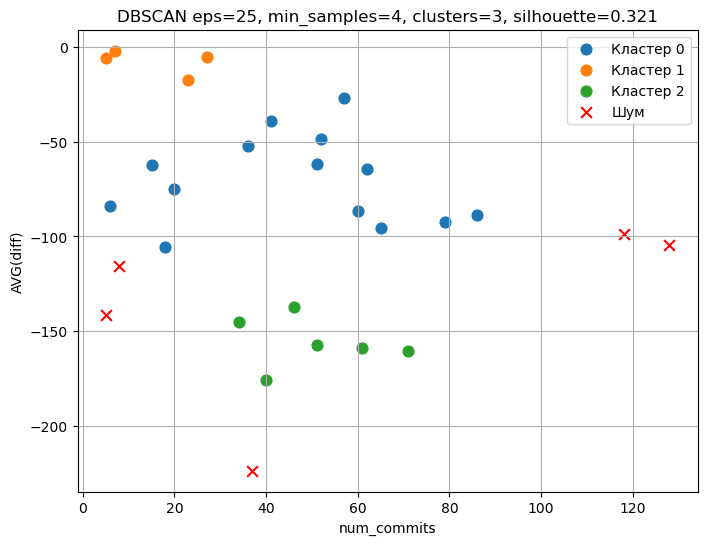

eps=25, min_samples=5, clusters=2, noise=16, silhouette_score=0.123


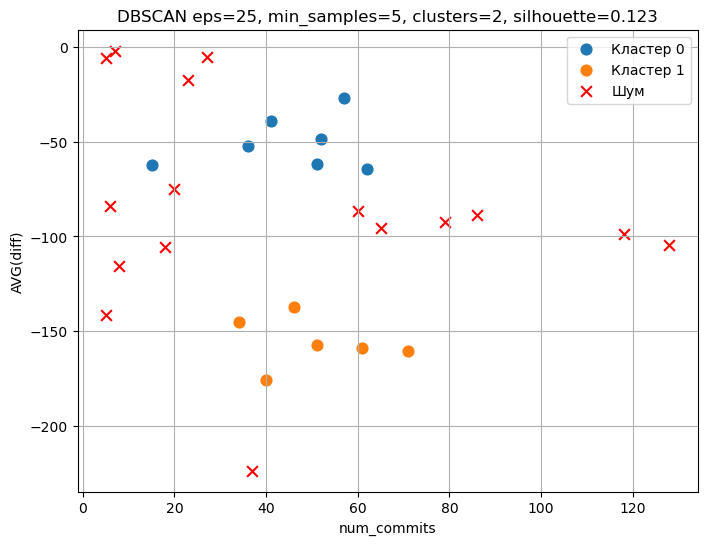

eps=30, min_samples=2, clusters=2, noise=1, silhouette_score=0.199


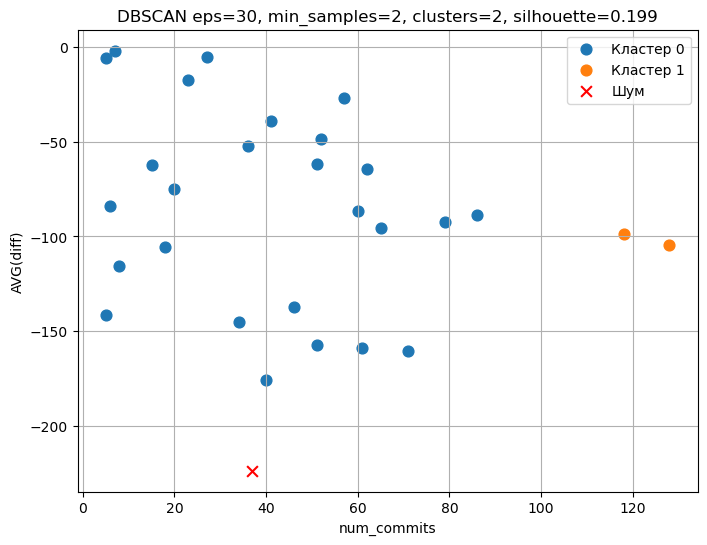

eps=30, min_samples=3, clusters=1, noise=3, silhouette_score=N/A


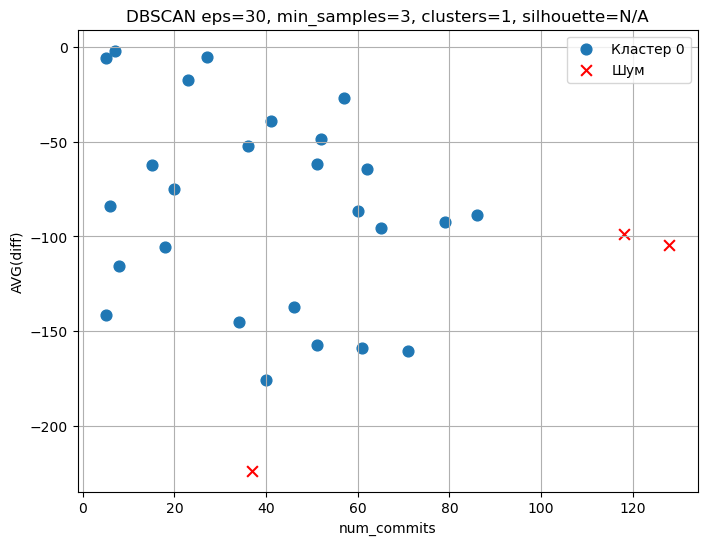

eps=30, min_samples=4, clusters=2, noise=4, silhouette_score=0.379


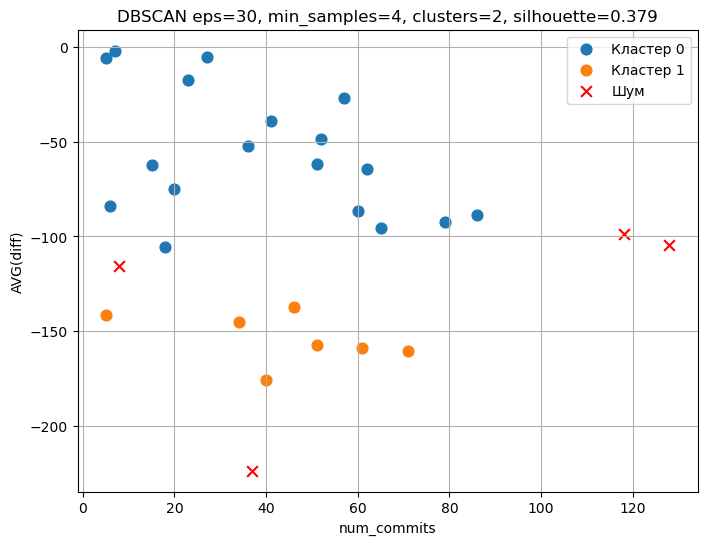

eps=30, min_samples=5, clusters=2, noise=7, silhouette_score=0.322


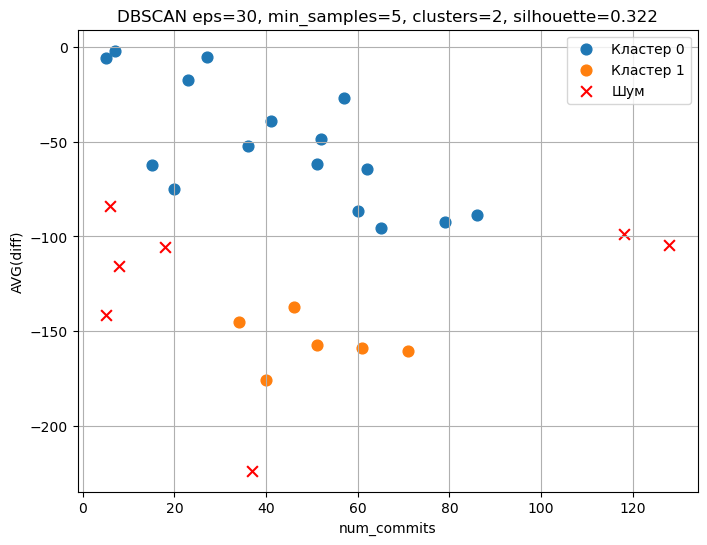

In [59]:
eps_list = [5, 10, 15, 20, 25, 30]
min_samples_list = [2, 3, 4, 5]

results = []

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(X, labels)
            score_str = f"{score:.3f}"
        else:
            score_str = "N/A"

        results.append((eps, min_samples, n_clusters, n_noise, score_str))
        
        # Вывод в консоль
        print(f"eps={eps}, min_samples={min_samples}, "
              f"clusters={n_clusters}, noise={n_noise}, silhouette_score={score_str}")
        
        # Рисуем график
        plt.figure(figsize=(8, 6))
        unique_labels = set(labels)
        colors = cm.get_cmap('viridis', len(unique_labels))

        for k in unique_labels:
            class_member_mask = (labels == k)
            xy = X[class_member_mask]
            if k == -1:
                # Шум
                plt.scatter(xy[:, 0], xy[:, 1], c='red', marker='x', s=60, label='Шум')
            else:
                plt.scatter(xy[:, 0], xy[:, 1], s=60, label=f'Кластер {k}')

        plt.title(f'DBSCAN eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score_str}')
        plt.xlabel('num_commits')
        plt.ylabel('AVG(diff)')
        plt.grid(True)
        plt.legend()
        plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

## 📌 Что такое Hierarchical Clustering (Agglomerative)?

**Иерархическая кластеризация (снизу вверх, агломеративная)** — метод, при котором:

- Каждая точка изначально считается **отдельным кластером**.
- Кластеры **объединяются попарно**, пока не останется 1 кластер или не достигнем `n_clusters`.

### ⚙️ Объединение кластеров зависит от:

- **`linkage` (метрика объединения):**
  - `'ward'` (по умолчанию) — минимизация увеличения внутрикластерной дисперсии.
  - `'complete'` — максимальное расстояние между точками кластеров.
  - `'average'` — среднее расстояние между точками кластеров.
  - `'single'` — минимальное расстояние между точками кластеров.

- **`affinity` (метрика расстояния):**
  - По умолчанию `'euclidean'`.

---

### 🛠️ Используется для:
✅ Выделения **вложенных кластеров** в данных.  
✅ Анализа **структуры данных** и плотности.  
✅ Построения **дендрограмм** для визуальной оценки и выбора количества кластеров.

---

### 📥 Импорт для использования:

```python
from sklearn.cluster import AgglomerativeClustering
```


Silhouette Score: 0.464


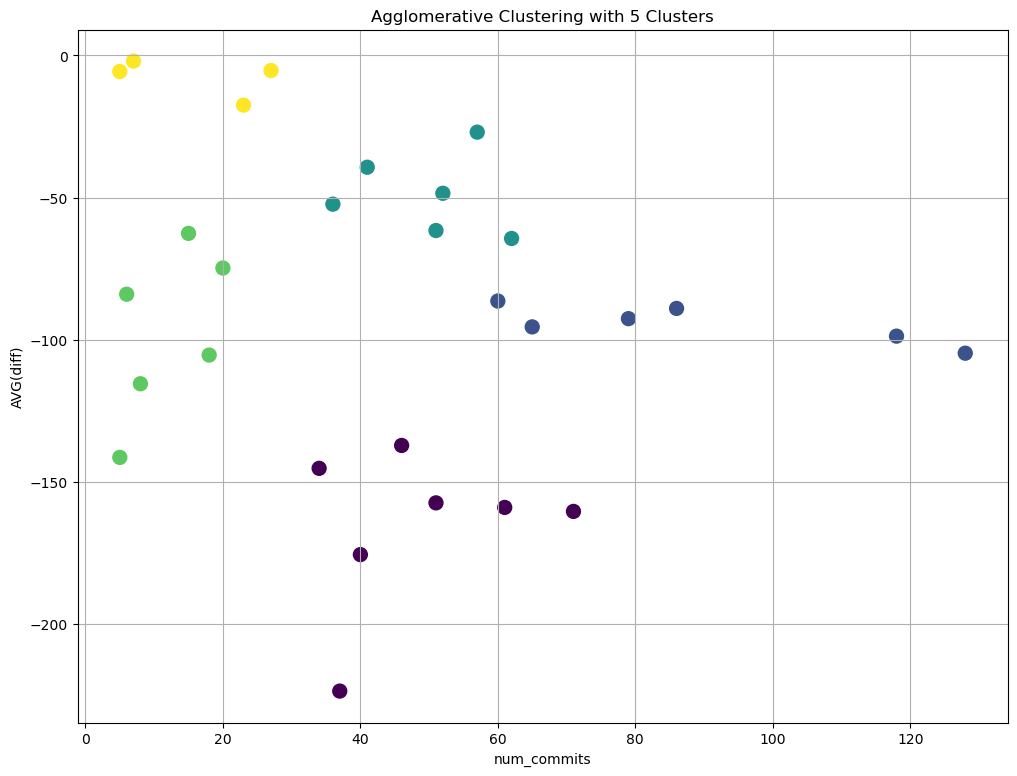

In [66]:
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(X)
df['AG_cluster'] = labels

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('Agglomerative Clustering with 5 Clusters')
plt.grid(True)
plt.show()

n_clusters = 2, Silhouette Score = 0.359, Clusters: 2


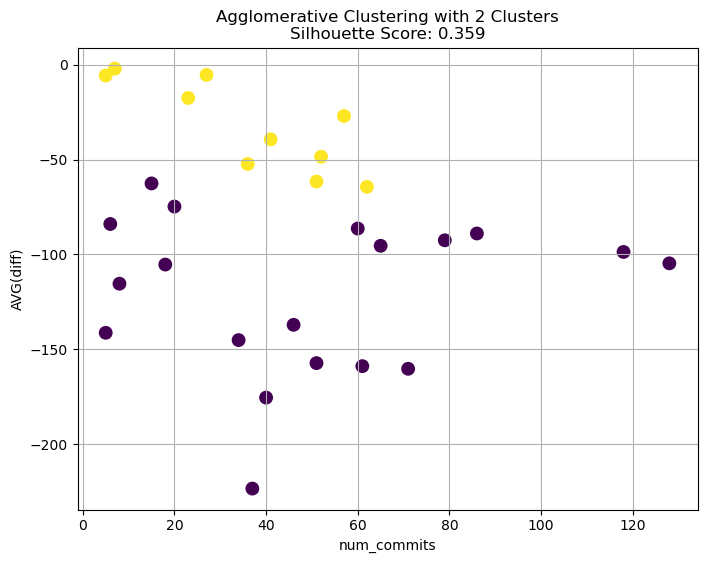

n_clusters = 3, Silhouette Score = 0.339, Clusters: 3


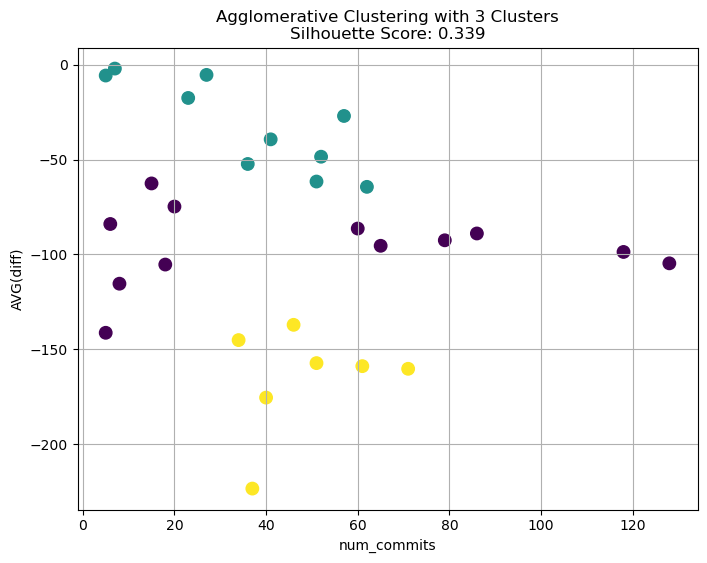

n_clusters = 4, Silhouette Score = 0.445, Clusters: 4


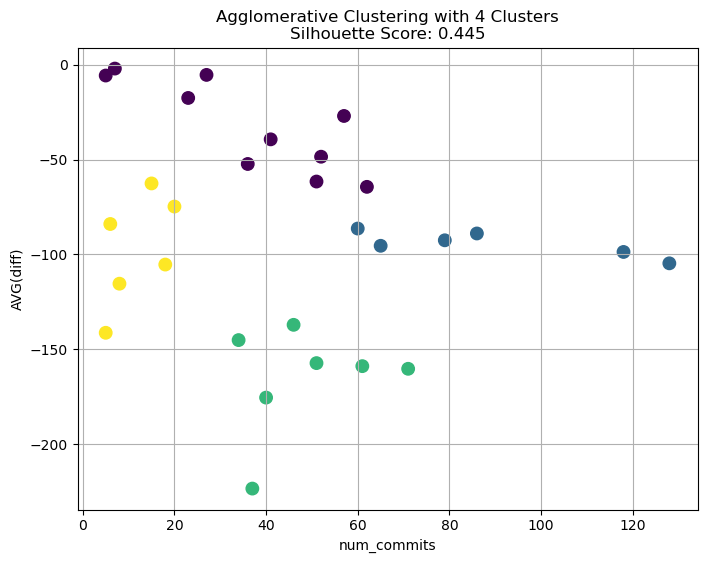

n_clusters = 5, Silhouette Score = 0.464, Clusters: 5


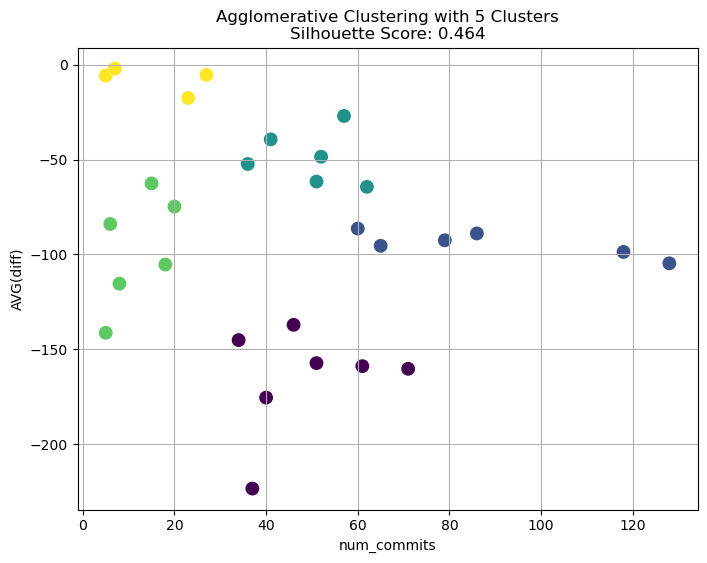

n_clusters = 6, Silhouette Score = 0.453, Clusters: 6


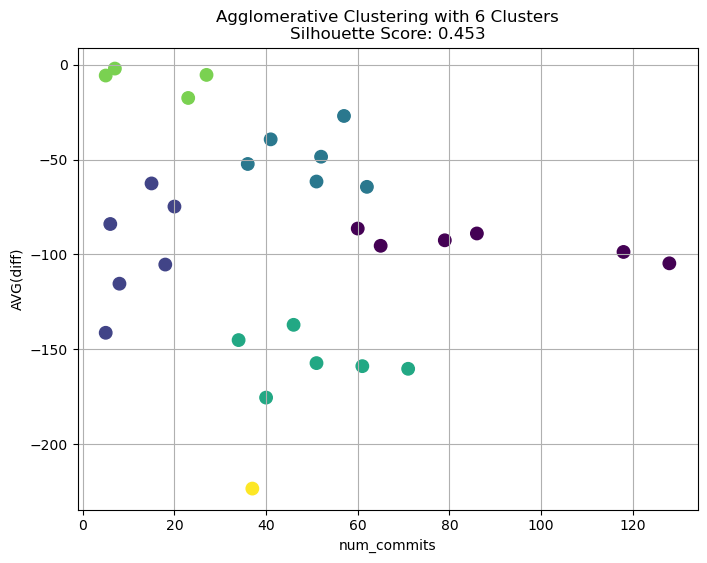

In [70]:
n_clusters_list = [2, 3, 4, 5, 6]

for k in n_clusters_list:

    agg = AgglomerativeClustering(n_clusters=k)
    

    labels = agg.fit_predict(X)

    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        score_str = f"{score:.3f}"
    else:
        score_str = "N/A"
    

    print(f"n_clusters = {k}, Silhouette Score = {score_str}, Clusters: {len(set(labels))}")

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=80)
    plt.title(f'Agglomerative Clustering with {k} Clusters\nSilhouette Score: {score_str}')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.grid(True)
    plt.show()

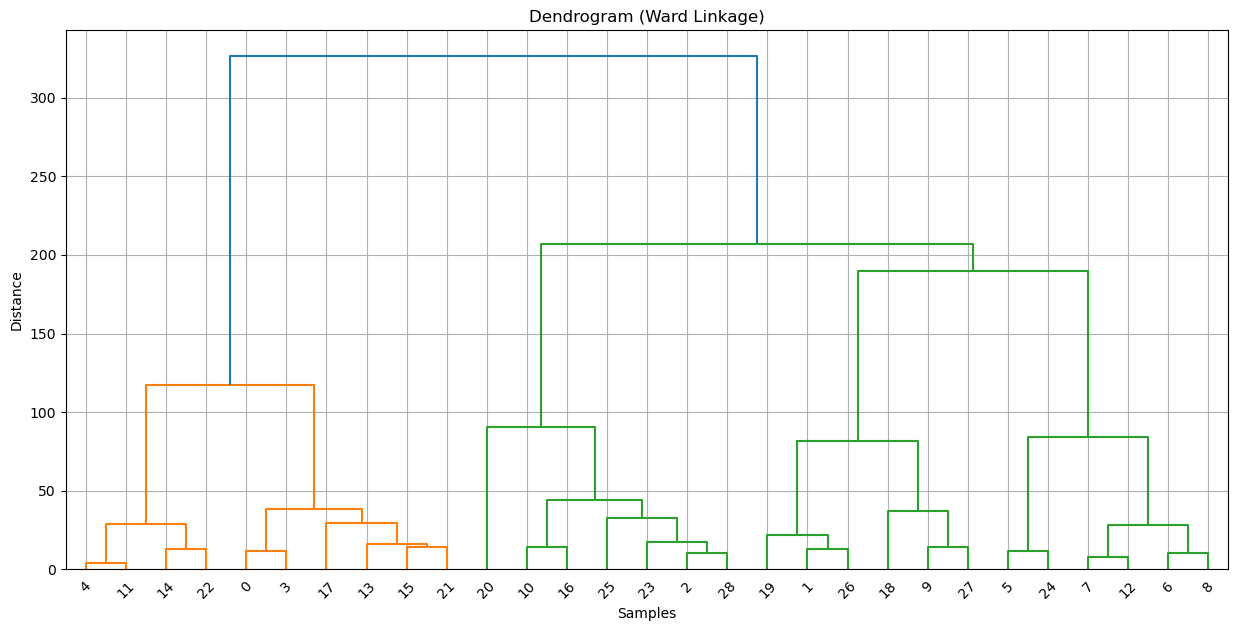

In [71]:
plt.figure(figsize=(15, 7))
dendro = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [72]:
def optimize_cluster_param(model_class, base_params, param_name, param_range, X):
    scores = []
    labels_list = []
    
    for param_value in param_range:
        # Обновляем параметр
        params = base_params.copy()
        params[param_name] = param_value
        
        # Инициализируем и обучаем модель
        model = model_class(**params)
        labels = model.fit_predict(X)
        
        # Считаем silhouette_score
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1  # плохое разделение
        scores.append(score)
        labels_list.append(labels)
        
        print(f"{param_name}={param_value} ➔ silhouette_score={score:.3f}, clusters={len(set(labels))}")
    
    # Находим лучшее значение параметра
    best_idx = np.argmax(scores)
    best_param = param_range[best_idx]
    best_labels = labels_list[best_idx]
    
    print(f"\n✅ Best {param_name} = {best_param}, silhouette_score = {scores[best_idx]:.3f}")
    
    # Построение графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1️⃣ График silhouette_score vs param_value
    axes[0].plot(param_range, scores, marker='o')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title(f'Silhouette Score vs {param_name}')
    axes[0].grid(True)
    
    # 2️⃣ Scatter plot кластеров при лучшем параметре
    scatter = axes[1].scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=60)
    axes[1].set_xlabel('num_commits')
    axes[1].set_ylabel('AVG(diff)')
    axes[1].set_title(f'Best {param_name} = {best_param}')
    axes[1].grid(True)
    
    plt.colorbar(scatter, ax=axes[1], label='Cluster Label')
    plt.tight_layout()
    plt.show()
    
    return best_param, scores

n_clusters=2 ➔ silhouette_score=0.419, clusters=2
n_clusters=3 ➔ silhouette_score=0.445, clusters=3
n_clusters=4 ➔ silhouette_score=0.415, clusters=4
n_clusters=5 ➔ silhouette_score=0.352, clusters=5
n_clusters=6 ➔ silhouette_score=0.395, clusters=6
n_clusters=7 ➔ silhouette_score=0.396, clusters=7
n_clusters=8 ➔ silhouette_score=0.486, clusters=8

✅ Best n_clusters = 8, silhouette_score = 0.486


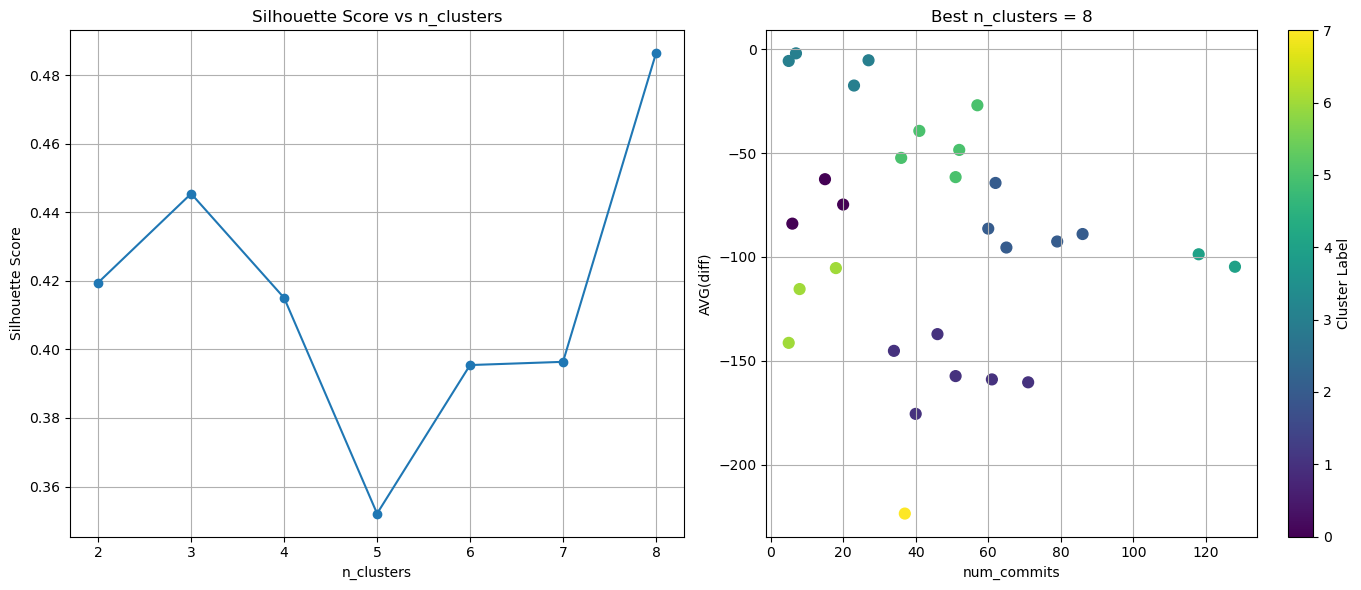

In [73]:
param_range = [2, 3, 4, 5, 6, 7, 8]
best_k, scores = optimize_cluster_param(KMeans, {'random_state': 21}, 'n_clusters', param_range, X)

eps=5 ➔ silhouette_score=-1.000, clusters=1
eps=10 ➔ silhouette_score=-1.000, clusters=1
eps=15 ➔ silhouette_score=-0.006, clusters=4
eps=20 ➔ silhouette_score=0.047, clusters=5
eps=25 ➔ silhouette_score=0.323, clusters=4
eps=30 ➔ silhouette_score=0.294, clusters=2

✅ Best eps = 25, silhouette_score = 0.323


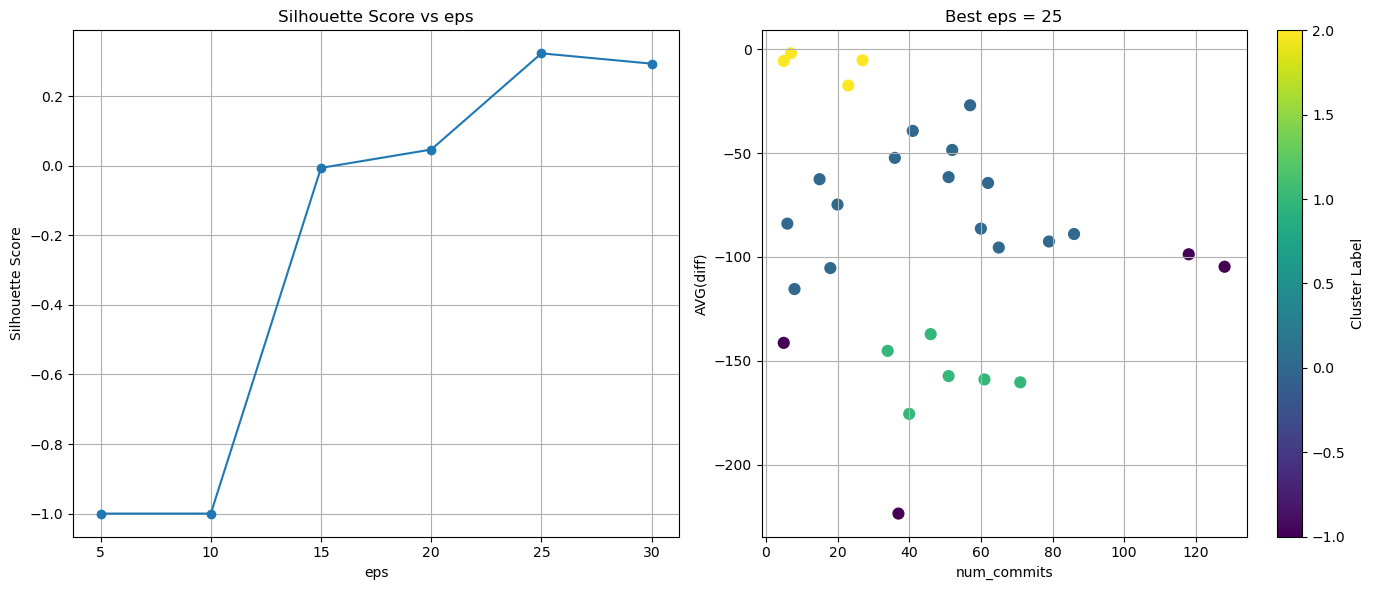

In [74]:
param_range = [5, 10, 15, 20, 25, 30]
best_eps, scores = optimize_cluster_param(DBSCAN, {'min_samples': 3}, 'eps', param_range, X)

n_clusters=2 ➔ silhouette_score=0.359, clusters=2
n_clusters=3 ➔ silhouette_score=0.339, clusters=3
n_clusters=4 ➔ silhouette_score=0.445, clusters=4
n_clusters=5 ➔ silhouette_score=0.464, clusters=5
n_clusters=6 ➔ silhouette_score=0.453, clusters=6
n_clusters=7 ➔ silhouette_score=0.487, clusters=7
n_clusters=8 ➔ silhouette_score=0.508, clusters=8

✅ Best n_clusters = 8, silhouette_score = 0.508


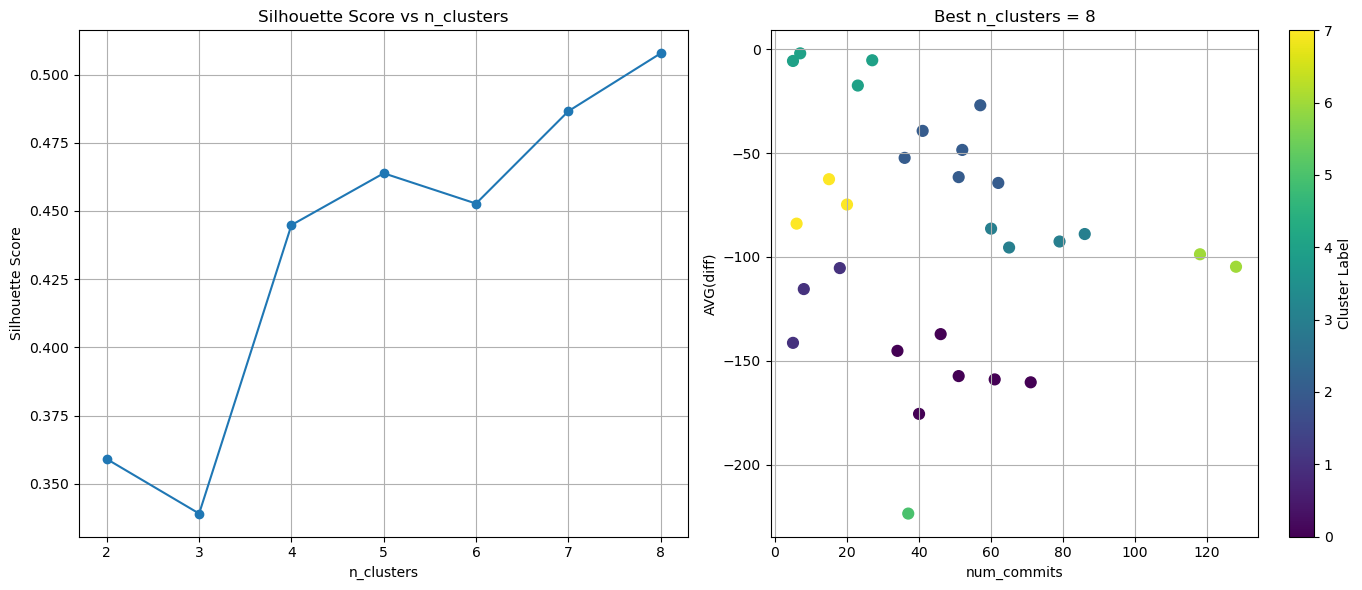

In [75]:
param_range = [2, 3, 4, 5, 6, 7, 8]
best_k, scores = optimize_cluster_param(AgglomerativeClustering, {}, 'n_clusters', param_range, X)